In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### <b> The objective of this project was to find the variables relevant to car price prediction </b>

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


It's important to know what data format you're dealing with in your variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### <b> Checking for missing data </b>

<AxesSubplot:>

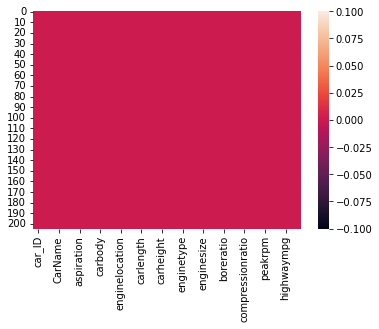

In [5]:
sns.heatmap(df.isna())

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<b> just customary to check the max and min prices </b>

In [10]:
df[df['price'] == df['price'].max()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400.0


In [11]:
df[df['price'] == df['price'].min()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0


### <b> First we want to perform some EDA on our data and since the objective is to predict factors that affect car price we can check the relationships between features and price </b>

In [12]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [13]:
df.corr()['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

<b> For now we can see the relationship between numerical values and price, now let us visualize the categorical features and how they affect price </b>

<AxesSubplot:xlabel='doornumber', ylabel='price'>

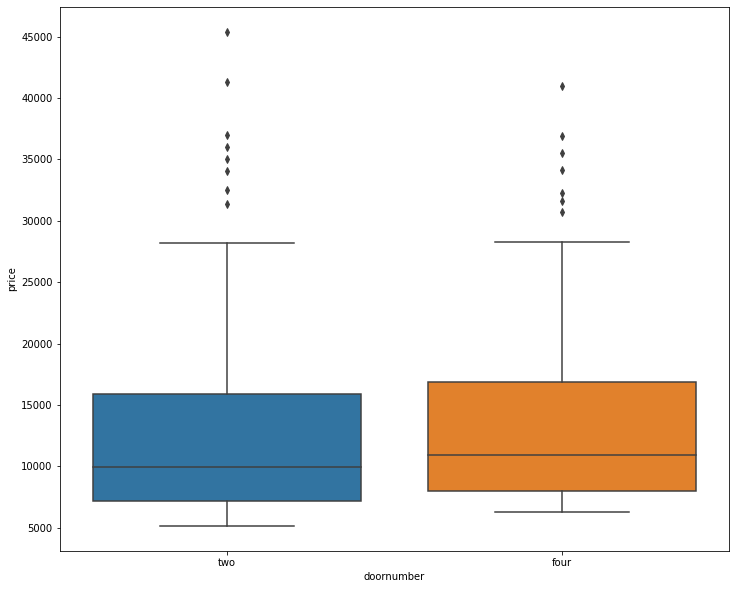

In [14]:
plt.figure(figsize=(12,10))
sns.boxplot(x='doornumber',y='price',data=df)

<b> There's barely any visible difference between the prices although four door looks higher but we can extract their exact values </b>

In [15]:
two_door_mean = df[df['doornumber'] == 'two']['price'].mean()
print(f"The mean price for a 2 door car is ${round(two_door_mean)}")

The mean price for a 2 door car is $12990


In [16]:
four_door_mean = df[df['doornumber'] == 'four']['price'].mean()
print(f"The mean price for a 4 door car is ${round(four_door_mean)}")

The mean price for a 4 door car is $13501


In [17]:
print(f"The mean price for the cars in this data set is ${round(df['price'].mean())}")

The mean price for the cars in this data set is $13277


In [18]:
print(f"The standard deviation in car price value in this data set is ${round(df['price'].std())}")

The standard deviation in car price value in this data set is $7989


In [19]:
print(f"While the mean difference in door cateogory prices is ${round(four_door_mean - two_door_mean)}")

While the mean difference in door cateogory prices is $511


<b> The price difference is nothing compared to the variance so I don't think it makes a hugde difference really </b>

<b> four door is slightly higher but I don't know if this should be turned into a numerical value to analyze price, instead of it being left as a category anyway we'll try </b>

In [20]:
def numeric_doornumber(x):
    '''currently we only have two categories which are 2 door and four door '''
    if x.lower() == 'two':
        return 2
    elif x.lower() == 'four':
        return 4

In [21]:
df['numeric_doornumber'] = df['doornumber'].apply(numeric_doornumber)

<b> Now it's time to check the correlation between door and price from a numerical standpoint for model compatibility </b>

In [22]:
df['numeric_doornumber'].dtype #making sure we have integers 

dtype('int64')

In [23]:
door_corr = df.corr()['price']['numeric_doornumber']
print(f'The numerical correlation between  the price and number of doors is {round(door_corr,3)}')

The numerical correlation between  the price and number of doors is 0.032


<b> We were unsure but now we can see that there is little to no correlation based of just number of doors </b>

<b> At first I wanted to analyze just the relationship between number of doors and price but we can try to analyze other categorical features too, to make sure we're not leaving out vital information in our model, we can try to visualize first </b>

In [24]:
df.select_dtypes('object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [25]:
categorical_df = pd.concat([df.select_dtypes('object'),df['price']],axis = 1)

<b> I will explore fuel type category next</b>

<AxesSubplot:xlabel='fueltype', ylabel='price'>

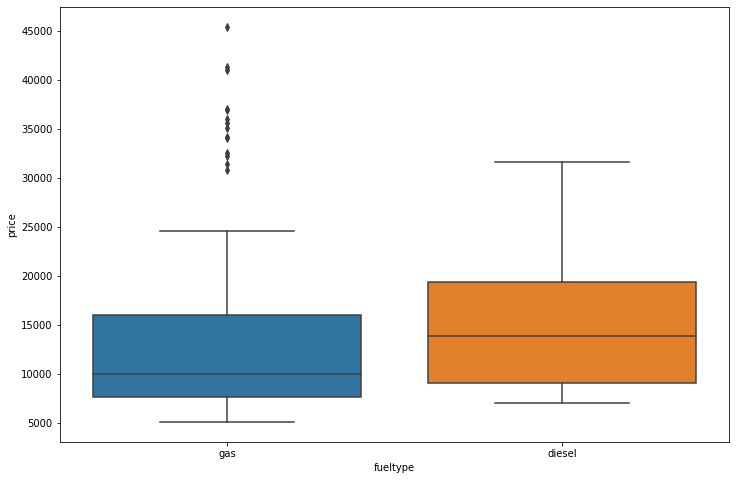

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='fueltype',y='price',data=df)

In [27]:
df['fueltype'].value_counts() # This data is somewhat skewed as the ratio is 9:1 and also the price variation doesn't seem like a huge difference so I don't think we should take this into account 

gas       185
diesel     20
Name: fueltype, dtype: int64

In [28]:
diesel_price_mean = df[df['fueltype']=='diesel']['price'].mean()
print(f"The average price of diesel fuel cars is ${round(diesel_price_mean)}")

The average price of diesel fuel cars is $15838


In [29]:
gas_price_mean = df[df['fueltype']=='gas']['price'].mean()
print(f"The average price of gas fuel cars is ${round(gas_price_mean)}")

The average price of gas fuel cars is $13000


In [30]:
fuel_categories_price_difference = diesel_price_mean - gas_price_mean
print(f"The difference in the average value of diesel run cars and fuel run cars is ${round(fuel_categories_price_difference)}, and the standard deviation in car price is ${round(df['price'].std())}")

The difference in the average value of diesel run cars and fuel run cars is $2838, and the standard deviation in car price is $7989


<b> I am not going to consider this because of the ratio of gas to diesel, the unbalanced data and the fact that the mean price difference in the category is still within 1 SD seems like enough reason to not consider this category in our model </b>

<b> moving on to aspiration</b>

<AxesSubplot:xlabel='aspiration', ylabel='price'>

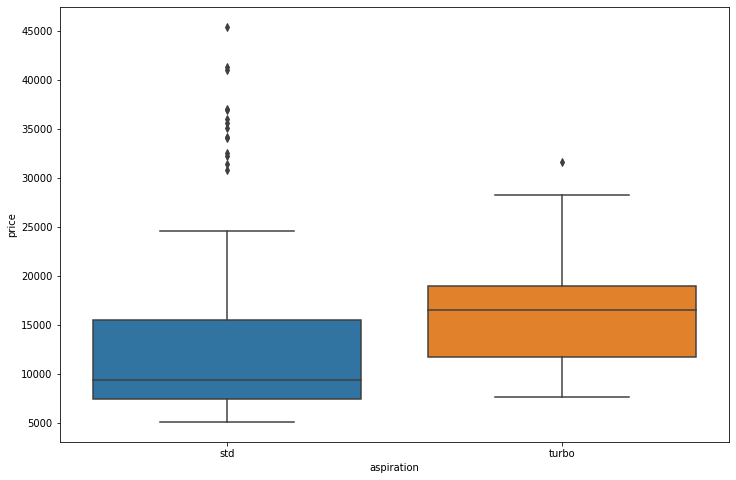

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(x='aspiration',y='price',data=df)

In [32]:
df['aspiration'].value_counts() #Although there is a lot less turbo cases this is still a decent ratio 

std      168
turbo     37
Name: aspiration, dtype: int64

In [33]:
std_mean_price = df[df['aspiration']=='std']['price'].mean()
turbo_mean_price = df[df['aspiration']=='turbo']['price'].mean()
print(f"The mean price of std aspiration vehicles is ${round(std_mean_price)} and the mean price of turbo aspiration vehicles is ${round(turbo_mean_price)}")

The mean price of std aspiration vehicles is $12611 and the mean price of turbo aspiration vehicles is $16298


In [34]:
aspiration_category_mean_difference = round(abs(std_mean_price - turbo_mean_price))
general_price_std = round(df['price'].std())
print(f"The mean difference in the aspiration classes is ${aspiration_category_mean_difference} while the general standard deviation in our car prices is ${general_price_std} ")

The mean difference in the aspiration classes is $3687 while the general standard deviation in our car prices is $7989 


<b> I will not include this category in my model because the balance is about 5:1 and the price difference is about half the standard deviation</b>

<AxesSubplot:xlabel='carbody', ylabel='price'>

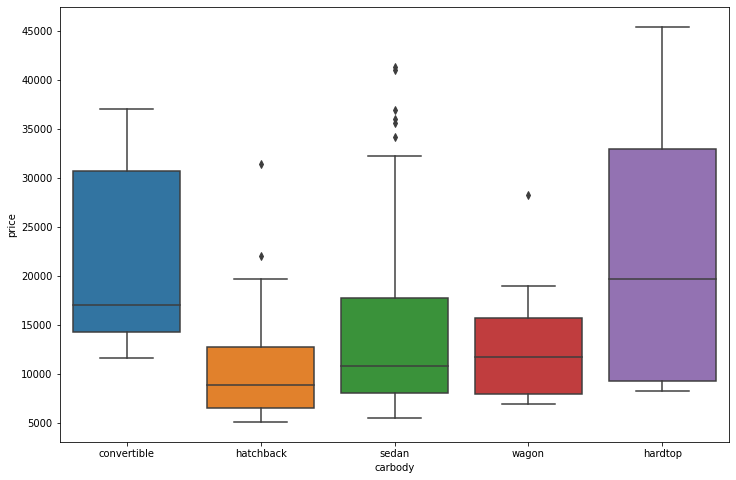

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x='carbody',y='price',data=df)

In [36]:
for i in df['carbody'].unique():
    print(f"The mean price for the {i} carbody category is ${round(df[df['carbody']==i]['price'].mean())}")

The mean price for the convertible carbody category is $21890
The mean price for the hatchback carbody category is $10377
The mean price for the sedan carbody category is $14344
The mean price for the wagon carbody category is $12372
The mean price for the hardtop carbody category is $22208


In [37]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

<b> I will include this category in the model because the range of minimum and maximum is more than the standard deviation and although hardtops and convertibles are relatively undersampled, they contribute to the variation in price </b>

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

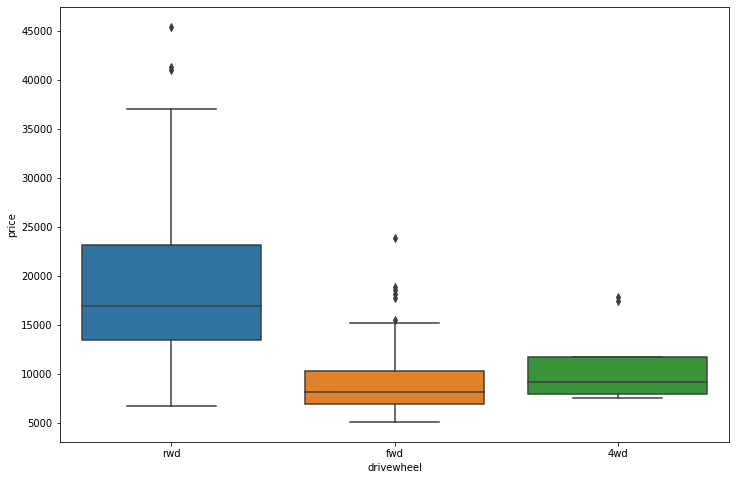

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x='drivewheel',y='price',data=df)

In [39]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [40]:
for i in df['drivewheel'].unique():
    print(f" The mean price of cars in the {i} drivewheel category is ${round(df[df['drivewheel']==i]['price'].mean())}")

 The mean price of cars in the rwd drivewheel category is $19911
 The mean price of cars in the fwd drivewheel category is $9239
 The mean price of cars in the 4wd drivewheel category is $11087


<b> I will also include this category in the model for the same reasons as carbody </b>

<b> I will be skipping the engine location category because of the undersampling the ratio is about 200:3 </b>

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

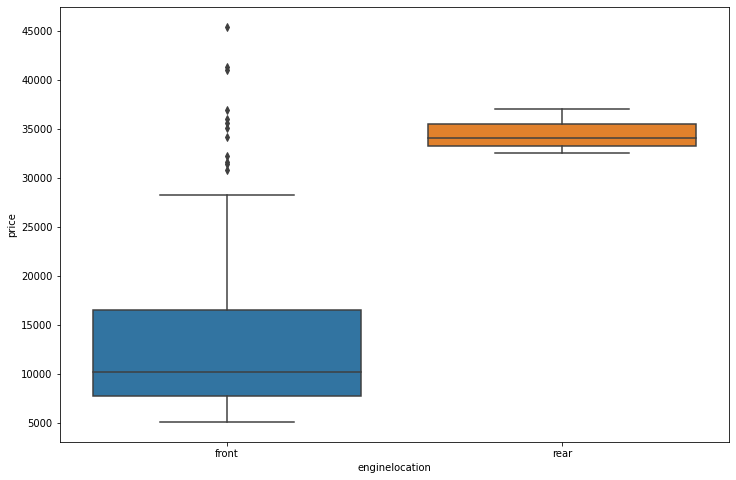

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(x='enginelocation',y='price',data=df)

In [42]:
df['enginelocation'].value_counts() # this is super skewed because rear cases are rare but because of the difference in price, we will add to model

front    202
rear       3
Name: enginelocation, dtype: int64

<b> Now analyzing the engine type category </b>

<AxesSubplot:xlabel='enginetype', ylabel='price'>

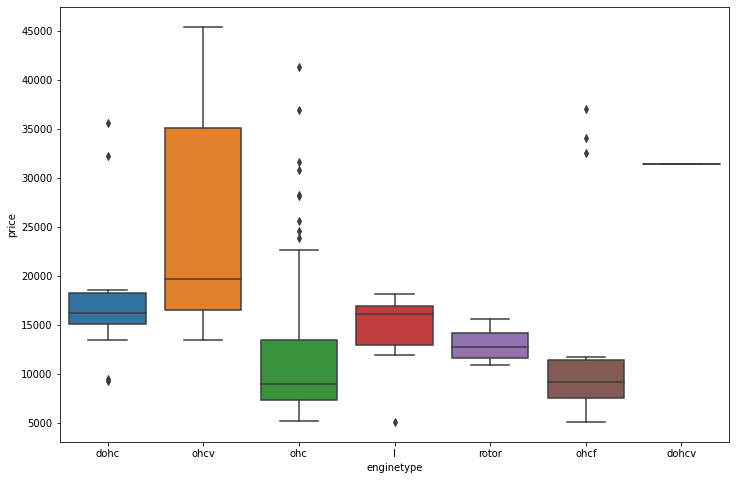

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x='enginetype',y='price',data=df)

In [44]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [45]:
for i in df['enginetype'].unique():
    print(f"The mean price of cars in the {i} category is ${round(df[df['enginetype'] == i]['price'].mean())} ")

The mean price of cars in the dohc category is $18116 
The mean price of cars in the ohcv category is $25098 
The mean price of cars in the ohc category is $11574 
The mean price of cars in the l category is $14628 
The mean price of cars in the rotor category is $13020 
The mean price of cars in the ohcf category is $13739 
The mean price of cars in the dohcv category is $31400 


<b> I will be including this category in the model </b>

<b> Now analyzing the cylinder number catrgory </b>

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

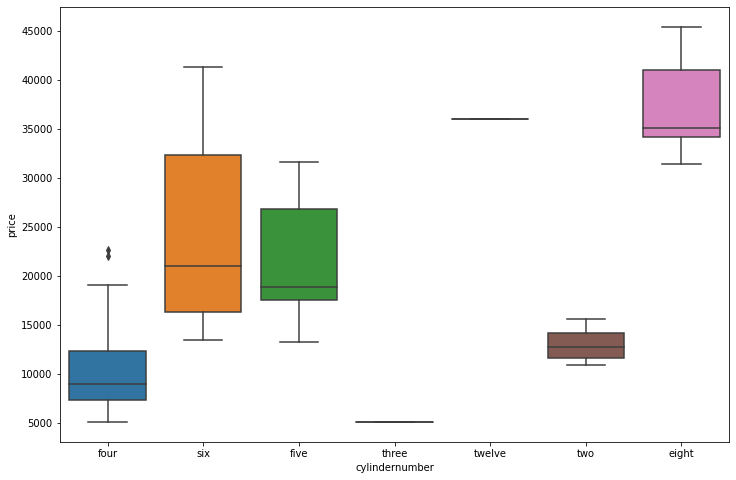

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(x='cylindernumber',y='price',data=df)

In [47]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [48]:
for i in df['cylindernumber'].unique():
    print(f"The average price of cars in the {i} cylinder number category is ${round(df[df['cylindernumber'] == i]['price'].mean())}")

The average price of cars in the four cylinder number category is $10286
The average price of cars in the six cylinder number category is $23672
The average price of cars in the five cylinder number category is $21630
The average price of cars in the three cylinder number category is $5151
The average price of cars in the twelve cylinder number category is $36000
The average price of cars in the two cylinder number category is $13020
The average price of cars in the eight cylinder number category is $37400


<b> Just off the range between four and six cylinder car prices, (which are the two most common classes in this category) this seems like a good category to consider </b>

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

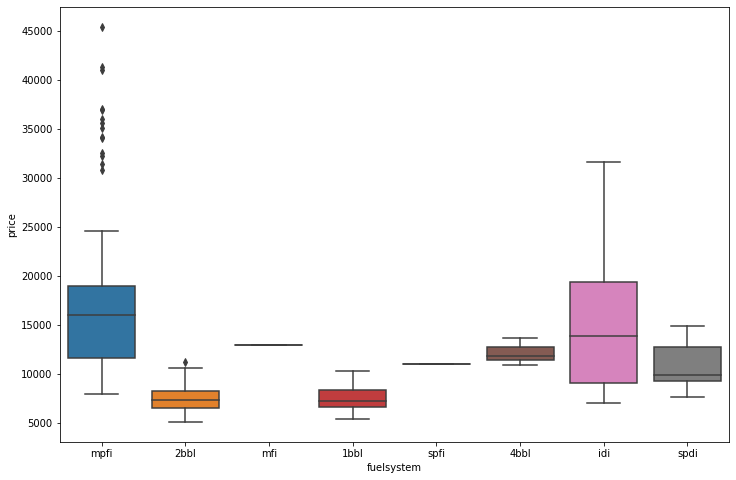

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x='fuelsystem',y='price',data=df)

In [50]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [51]:
for i in df['fuelsystem'].unique():
    print(f"The average price of cars in the {i} fuel system category is ${round(df[df['fuelsystem']==i]['price'].mean())}")

The average price of cars in the mpfi fuel system category is $17755
The average price of cars in the 2bbl fuel system category is $7478
The average price of cars in the mfi fuel system category is $12964
The average price of cars in the 1bbl fuel system category is $7556
The average price of cars in the spfi fuel system category is $11048
The average price of cars in the 4bbl fuel system category is $12145
The average price of cars in the idi fuel system category is $15838
The average price of cars in the spdi fuel system category is $10990


<b> Just off the range between mpfi and 2bbl fuel system car prices, (which are the two most common classes in this category) this seems like a good category to consider </b>

In [52]:
df['CarName'] # I need to find a way to seperate car brand from model to see the effect it has on price

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

#### <b> I really also wanted to see the effect of brands on the car prices because I think luxury brands cost more even though they might have the same features as more premium brands, just a little more EDA before building our model :) <b>

In [53]:
import random

In [54]:
for i in np.random.randint(0,len(df),10):
    ''' this is a random test to see if I can seperate brand by splitting'''
    print (df['CarName'][i].split()[0])

toyota
mercury
dodge
honda
volkswagen
peugeot
saab
toyota
plymouth
peugeot


<b> seems to be working </b>

In [55]:
df['brand'] = df['CarName'].apply(lambda x: x.split()[0])

In [56]:
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [57]:
brand_groupby = df.groupby(['brand','doornumber','fuelsystem','cylindernumber'])

In [58]:
brand_price_comparison = brand_groupby.agg({'price':'mean'})

<b> To compare, I used some categorical features (which I deemed somewhat important) to perform a groupby operation for comparing price, now I'm aware that these features are not more relevant to price than some of the numerical data we have but this is just for exploration and won't affect our model. If we had data with more entries and balanced samples we would have been able to do a more accurate analysis </b>

In [59]:
brand_price_comparison.loc[['audi','toyota']]

price
brand  doornumber fuelsystem cylindernumber              
audi   four       mpfi       five            19488.750000
                             four            13950.000000
       two        mpfi       five            16554.583500
toyota four       2bbl       four             7730.222222
                  idi        four             8794.666667
                  mpfi       four            10270.500000
                             six             15690.000000
       two        2bbl       four             6995.500000
                  mpfi       four            10916.250000
                             six             16278.000000

<b> comparison of audi four door, mpfi fuel system, four cylinder for a mean price of $13950 while a toyota with the same qualities going for $10270 tells you that the brand name / legacy might influence prices </b>

In [60]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,numeric_doornumber,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,2,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,2,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,2,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,4,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,4,audi


<b> Upon review I realized I skipped one of my features which is symboling, I didn't pick up on it because though it is categorical, the values are integers and not strings</b>

<AxesSubplot:xlabel='symboling', ylabel='price'>

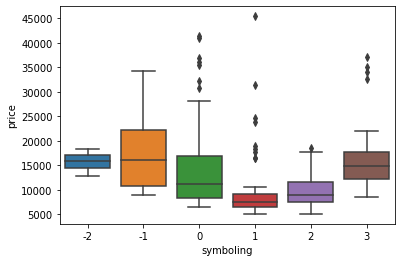

In [61]:
sns.boxplot(x='symboling',y='price',data=df)

In [62]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [63]:
for i in df['symboling'].unique():
    print(f"The average price of {i} symboling value vehicles is ${round(df[df['symboling'] == i]['price'].mean())}")

The average price of 3 symboling value vehicles is $17221
The average price of 1 symboling value vehicles is $10038
The average price of 2 symboling value vehicles is $10109
The average price of 0 symboling value vehicles is $14367
The average price of -1 symboling value vehicles is $17331
The average price of -2 symboling value vehicles is $15782


<b> the range seems to be around the price variation so I will take it into account </b>

<b> dropping some of the columns we said were not relevant to the model</b><br> <b>Time to build our model but we'll start with a little feature engineering</b>

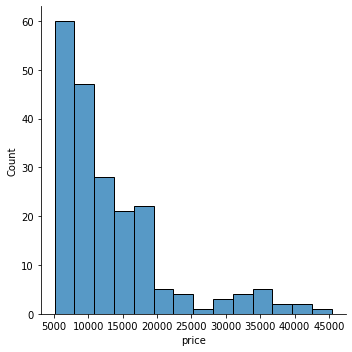

In [64]:
# viewing our price distribution 
sns.displot(df['price'])

<b> using corr function to analyze the numerical values </b>

In [65]:
df.corr()['price']

car_ID               -0.109093
symboling            -0.079978
wheelbase             0.577816
carlength             0.682920
carwidth              0.759325
carheight             0.119336
curbweight            0.835305
enginesize            0.874145
boreratio             0.553173
stroke                0.079443
compressionratio      0.067984
horsepower            0.808139
peakrpm              -0.085267
citympg              -0.685751
highwaympg           -0.697599
price                 1.000000
numeric_doornumber    0.031835
Name: price, dtype: float64

In [66]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'numeric_doornumber', 'brand'],
      dtype='object')

In [67]:
df['boreratio']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: boreratio, Length: 205, dtype: float64

In [68]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,numeric_doornumber,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,2,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,2,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,2,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,4,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,4,audi


In [69]:
model_df = df.drop(['car_ID','CarName','fueltype','aspiration','doornumber','enginelocation','carheight','stroke','compressionratio','peakrpm','numeric_doornumber'],axis=1)

In [70]:
model_df.drop('brand',axis = 1, inplace=True)

<b> I dropped the 'irrelevant' categorical features and screened the continuous features with low price correlation values and although 'symboling' appears to have a low correlation value it's important to remember that it is a category and not a continuous value</b>

In [71]:
model_df.head()

,symboling,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,3,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,3,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,1,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,2,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,2,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


<b> converting our 'relevant' categorical data into dummy variables</b>

In [72]:
carbody_dummies = pd.get_dummies(model_df['carbody'],drop_first=True)

In [73]:
drivewheel_dummies = pd.get_dummies(model_df['drivewheel'],drop_first=True)

In [74]:
enginetype_dummies = pd.get_dummies(model_df['enginetype'],drop_first=True)

In [75]:
cylindernumber_dummies = pd.get_dummies(model_df['cylindernumber'],drop_first=True)

In [76]:
fuelsystem_dummies = pd.get_dummies(model_df['fuelsystem'],drop_first=True)

In [77]:
symboling_dummies = pd.get_dummies(model_df['symboling'],drop_first=True)

In [78]:
model_df = pd.concat([model_df, carbody_dummies, drivewheel_dummies, enginetype_dummies, cylindernumber_dummies, fuelsystem_dummies,symboling_dummies], axis = 1)

<b> we have to drop off the original columns with the categorical features </b>

In [79]:
model_df.drop(['carbody','drivewheel','enginetype','cylindernumber','fuelsystem','symboling'],axis=1,inplace=True)

In [80]:
model_df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,1,0,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,1,0,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,1,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,1,0,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0,...,0,0,1,0,0,1,0,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0,...,0,0,1,0,0,1,0,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0,...,0,0,1,0,0,1,0,0,0,0
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0,...,1,0,0,0,0,1,0,0,0,0


<b> model building </b>

In [81]:
X = model_df.drop('price',axis=1).values
y = model_df['price'].values

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

In [87]:
X_test = scaler.transform(X_test)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [89]:
X_train.shape

(143, 39)

<b> for our model we will prevent overfitting using early stop  and dropout methods </b>

In [90]:
from tensorflow.keras.layers import Dropout

In [117]:
model = Sequential() 

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [118]:
from tensorflow.keras.callbacks import EarlyStopping

In [119]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=100)

In [120]:
model.fit(x= X_train, y= y_train, epochs= 5000, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/5000
5/5 [==============================] - 1s 33ms/step - loss: 240736208.0000 - val_loss: 237572976.0000
Epoch 2/5000
5/5 [==============================] - 0s 7ms/step - loss: 240730944.0000 - val_loss: 237567696.0000
Epoch 3/5000
5/5 [==============================] - 0s 7ms/step - loss: 240727216.0000 - val_loss: 237561296.0000
Epoch 4/5000
5/5 [==============================] - 0s 8ms/step - loss: 240717648.0000 - val_loss: 237552864.0000
Epoch 5/5000
5/5 [==============================] - 0s 9ms/step - loss: 240707856.0000 - val_loss: 237541776.0000
Epoch 6/5000
5/5 [==============================] - 0s 8ms/step - loss: 240692640.0000 - val_loss: 237526320.0000
Epoch 7/5000
5/5 [==============================] - 0s 8ms/step - loss: 240675984.0000 - val_loss: 237504736.0000
Epoch 8/5000
5/5 [==============================] - 0s 10ms/step - loss: 240657136.0000 - val_loss: 237475152.0000
Epoch 9/5000
5/5 [==============================] - 0s 8ms/step - loss: 240617776.0000

In [121]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

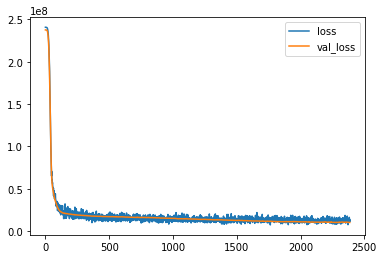

In [138]:
model_loss.plot()

In [123]:
predictions = model.predict(X_test)

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [125]:
np.sqrt(mean_squared_error(y_test,predictions))

3215.59512064022

In [133]:
print(f"This model has an explained variance score of about {round(explained_variance_score(y_test,predictions),2)}")

This model has an explained variance score of about 0.85


Text(0.5, 1.0, 'predicted price values vs actual price values ')

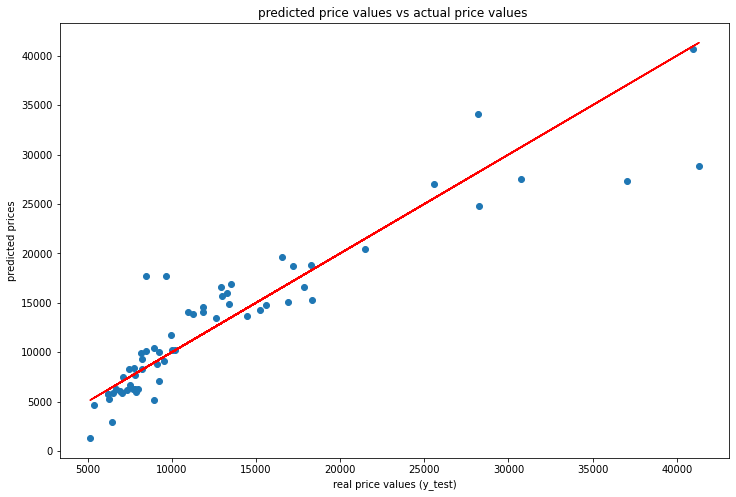

In [127]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.xlabel('real price values (y_test)')
plt.ylabel('predicted prices')
plt.title('predicted price values vs actual price values ')

C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

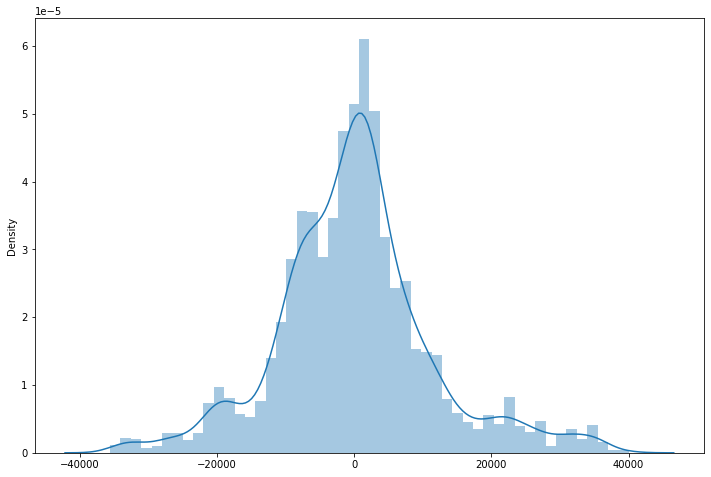

In [128]:
plt.figure(figsize=(12,8))
sns.distplot(y_test-predictions)

<b> The explained variance score is relatively good and the redisuals plot is normally distributed so I think our model is acceptable</b>


Text(0, 0.5, 'residuals')

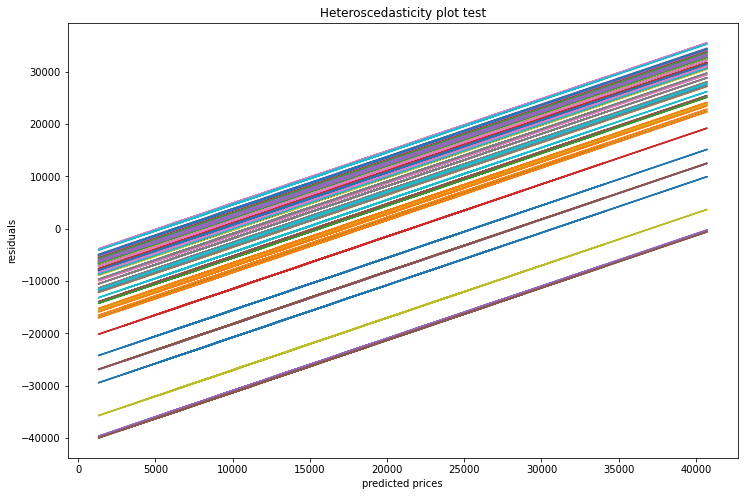

In [153]:
plt.figure(figsize=(12,8))
residuals = predictions - y_test
plt.plot(predictions,residuals)
plt.title('Heteroscedasticity plot test')
plt.xlabel('predicted prices')
plt.ylabel('residuals')



<b> The linear pattern between the residuals and predicted values hint towards homoscedasticity which is a good sign, but I stand to be corrected </b>

<b> This model could be improved as usual but we'd require more data, The distribution plot of the price column earlier was not normally distributed and that is not optimal for a linear regression model </b>

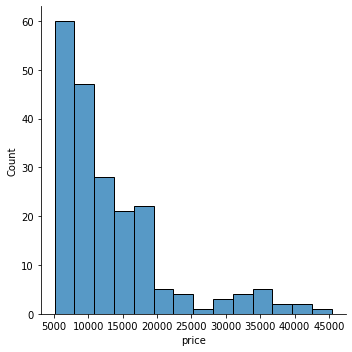

In [134]:
sns.displot(df['price'])